# Video pipeline with Yolo + Resnet Model

In [1]:
import pandas as pd
import os
import sys
from pprint import PrettyPrinter
import matplotlib.pyplot as plt

pp = PrettyPrinter(indent=4)
from barazmoon.twitter import twitter_workload_generator

# get an absolute path to the directory that contains parent files
__file__ = globals()["_dh"][0]
project_dir = __file__ = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..")))

from experiments.utils.constants import FINAL_RESULTS_PATH
from experiments.utils.parser import AdaptationParser

In [2]:
series = 8

series_path = os.path.join(FINAL_RESULTS_PATH, "series", str(series))

loader = AdaptationParser(
    series_path=series_path,
    model_name="video",
)

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'accuracy_method': 'sum',
    'adaptation_interval': 20,
    'allocation_mode': 'base',
    'alpha': 0,
    'baseline_mode': 'scale',
    'batching_cap': 64,
    'benchmark_duration': 1,
    'beta': 1,
    'gamma': 0,
    'initial_active_model': ['yolov5n', 'resnet18'],
    'initial_batch': [1, 1],
    'initial_cpu_allocation': [1, 1],
    'initial_replica': [1, 1],
    'metadata': 'checking the effect of changing all variables under arrival '
                'rate 1,\\n cpu type: Intel(R) Xeon(R) Gold 6126 CPU @ 2.60GHz',
    'mode': 'exponential',
    'model_name': ['yolo', 'resnet-human'],
    'monitoring_duration': 10,
    'nodes': [   {   'cpu_request': '2',
                     'data_type': 'image',
                     'max_batch_size': '1',
                     'max_batch_time': '1',
                     'memory_request': '2Gi',
                     'model_variants': 'yolov5n',
                     'node_name': 'yolo',
                     'num_interop_thr

In [4]:
# load the sent workload
workload_type = config["workload_type"]
workload_config = config["workload_config"][0]
start = workload_config["start"]
end = workload_config["end"]
damping_factor = workload_config["damping_factor"]
sent_workload = twitter_workload_generator(
    days=f"{start}-{end}", damping_factor=damping_factor
)
sent_workload

[16,
 15,
 18,
 15,
 18,
 15,
 14,
 14,
 13,
 15,
 15,
 18,
 19,
 18,
 13,
 11,
 13,
 14,
 17,
 12,
 13,
 15,
 14,
 14,
 15,
 13,
 17,
 18,
 16,
 13,
 13,
 17,
 13,
 14,
 15,
 14,
 17,
 15,
 10,
 12,
 19,
 18,
 13,
 13,
 19,
 14,
 17,
 17,
 15,
 16,
 10,
 11,
 13,
 17,
 16,
 14,
 14,
 15,
 15,
 12,
 11,
 18,
 17,
 12,
 14,
 11,
 11,
 14,
 14,
 15,
 9,
 17,
 18,
 15,
 14,
 14,
 17,
 11,
 12,
 18,
 11,
 14,
 19,
 20,
 11,
 14,
 10,
 13,
 14,
 11,
 16,
 15,
 14,
 12,
 14,
 18,
 13,
 15,
 15,
 16,
 14,
 14,
 15,
 17,
 14,
 15,
 13,
 14,
 14,
 14,
 14,
 14,
 13,
 11,
 14,
 17,
 17,
 13,
 12,
 17,
 17,
 13,
 19,
 17,
 14,
 15,
 13,
 13,
 12,
 14,
 17,
 17,
 19,
 18,
 20,
 17,
 15,
 21,
 16,
 15,
 12,
 10,
 16,
 16,
 14,
 15,
 9,
 14,
 22,
 18,
 17,
 17,
 16,
 17,
 16,
 13,
 15,
 21,
 16,
 18,
 20,
 16,
 15,
 17,
 13,
 15,
 20,
 21,
 16,
 13,
 15,
 15,
 11,
 15,
 14,
 16,
 16,
 16,
 12,
 14,
 12,
 13,
 15,
 18,
 14,
 13,
 15,
 17,
 14,
 11,
 14,
 18,
 14,
 16,
 15,
 15,
 16,
 11,
 14,
 16,
 1

In [5]:
# key_config_df = loader.loader.key_config_mapper()
# display(key_config_df)
# key_config_df.columns
results = loader.result_processing()

In [6]:
experiment_id = 0
results = loader.loader._read_results()
flattened_results = loader.flatten_results(results[str(experiment_id)]["responses"])
latencies, timeout_count = loader.latency_calculator(flattened_results)
df = pd.DataFrame(latencies)
df

,client_to_pipeline_latencies,pipeline_to_client_latencies,task_0_model_latencies,task_0_to_task_1_latencies,task_1_model_latencies
0,0.272214,0.007911,0.096104,0.019003,0.055914
1,0.245724,0.006126,0.085473,0.093599,0.045277
2,0.120783,0.017747,0.105635,0.070430,0.042869
3,0.151552,0.010273,0.097583,0.131090,0.056212
4,0.057684,0.061390,0.076933,0.064845,0.117434
...,...,...,...,...,...
4494,37.978026,0.093696,0.485481,15.797395,0.611110
4495,57.879188,0.018984,0.352337,6.031264,0.397785
4496,55.471442,0.028058,0.697275,7.699165,0.413292
4497,57.854517,0.019277,0.352337,6.031264,0.397785


In [7]:
adaptation_log = loader.load_adaptation_log()
adaptation_log

{'timesteps': {'0': {'config': {'yolo': {'replicas': 4,
     'variant': 'yolov5n',
     'batch': '1',
     'cpu': 2,
     'latency': 0.19799016909011802,
     'accuracy': 0.0,
     'throughput': 5.050755825885657},
    'resnet-human': {'replicas': 4,
     'variant': 'resnet18',
     'batch': '1',
     'cpu': 2,
     'latency': 0.11658563552518876,
     'accuracy': 0.0,
     'throughput': 8.577386017541983}},
   'objective': None,
   'time_interval': 0,
   'monitored_load': [0],
   'predicted_load': 0},
  '1': {'config': {'yolo': {'cpu': 1,
     'replicas': 2,
     'batch': 4,
     'variant': 'yolov5n',
     'latency': 0.2952772217317099,
     'accuracy': 0.0,
     'throughput': 27.093183663414557},
    'resnet-human': {'cpu': 1,
     'replicas': 1,
     'batch': 8,
     'variant': 'resnet18',
     'latency': 0.22845245956797547,
     'accuracy': 0.0,
     'throughput': 35.018226615413695}},
   'objective': -3.0,
   'time_interval': 20,
   'monitored_load': [0.0,
    10.124,
    15.0,
 

In [9]:
series_changes = loader.series_changes(
    adaptation_log=adaptation_log
)  # TODO go inside this
series_changes

{'time_interval': [0,
  20,
  40,
  60,
  80,
  100,
  120,
  140,
  160,
  180,
  200,
  220,
  240,
  260,
  280,
  300,
  320,
  340,
  360],
 'objective': [None,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0],
 'monitored_load': [[0],
  [0.0,
   10.124,
   15.0,
   18.0,
   15.0,
   18.0,
   15.0,
   14.0,
   14.0,
   13.0,
   15.0,
   15.0,
   18.0,
   19.0,
   18.0,
   13.0],
  [0.0,
   10.124,
   15.0,
   18.0,
   15.0,
   18.0,
   15.0,
   14.0,
   14.0,
   13.0,
   15.0,
   15.0,
   18.0,
   19.0,
   18.0,
   13.0,
   11.0,
   13.0,
   14.0,
   17.0,
   12.0,
   13.0,
   15.0,
   14.0,
   14.0,
   15.0,
   13.0,
   17.0,
   18.0,
   16.0,
   13.0,
   13.0,
   17.0,
   13.0,
   14.0,
   15.0,
   14.0],
  [0.0,
   10.124,
   15.0,
   18.0,
   15.0,
   18.0,
   15.0,
   14.0,
   14.0,
   13.0,
   15.0,
   15.0,
   18.0,
   19.0,
   18.0,
   13.0,
   11.0,
   13.0,
   14.0,
   17.0,
  

[16, 15, 18, 15, 18, 15, 14, 14, 13, 15, 15, 18, 19, 18, 13, 11, 13, 14, 17, 12, 13, 15, 14, 14, 15, 13, 17, 18, 16, 13, 13, 17, 13, 14, 15, 14, 17, 15, 10, 12, 19, 18, 13, 13, 19, 14, 17, 17, 15, 16, 10, 11, 13, 17, 16, 14, 14, 15, 15, 12, 11, 18, 17, 12, 14, 11, 11, 14, 14, 15, 9, 17, 18, 15, 14, 14, 17, 11, 12, 18, 11, 14, 19, 20, 11, 14, 10, 13, 14, 11, 16, 15, 14, 12, 14, 18, 13, 15, 15, 16, 14, 14, 15, 17, 14, 15, 13, 14, 14, 14, 14, 14, 13, 11, 14, 17, 17, 13, 12, 17, 17, 13, 19, 17, 14, 15, 13, 13, 12, 14, 17, 17, 19, 18, 20, 17, 15, 21, 16, 15, 12, 10, 16, 16, 14, 15, 9, 14, 22, 18, 17, 17, 16, 17, 16, 13, 15, 21, 16, 18, 20, 16, 15, 17, 13, 15, 20, 21, 16, 13, 15, 15, 11, 15, 14, 16, 16, 16, 12, 14, 12, 13, 15, 18, 14, 13, 15, 17, 14, 11, 14, 18, 14, 16, 15, 15, 16, 11, 14, 16, 17, 14, 15, 13, 14, 13, 18, 20, 17, 16, 16, 15, 18, 15, 13, 17, 11, 14, 20, 15, 17, 16, 17, 20, 13, 14, 10, 17, 17, 15, 15, 21, 14, 13, 19, 16, 13, 13, 16, 14, 13, 15, 18, 16, 24, 16, 16, 17, 11, 12, 1

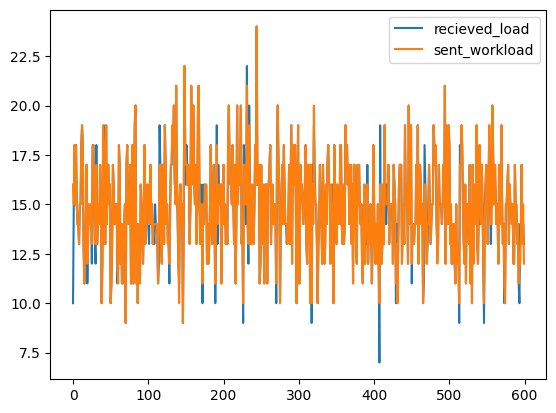

In [39]:
recieved_load = series_changes["recieved_load"]
recieved_load = [int(item) for item in recieved_load if item != 0]
x = [x for x in range(0, len(recieved_load))]
print(sent_workload)
print(recieved_load)

plt.plot(x, recieved_load, label="recieved_load")
plt.plot(x, sent_workload, label="sent_workload")
plt.legend()
plt.show()

In [1]:
# TODO sent load -> extract the sent date from twitter trace and also from the recived load on the server
# TODO model ranks/accuracies -> 1. load accuracy scores 2. start with Mehran but go rank based
# TODO model CPU usgages
# TODO SLA violations
# TODO

In [9]:
series_changes

{'time_interval': [0,
  30,
  60,
  90,
  120,
  150,
  180,
  210,
  240,
  270,
  300,
  330,
  360,
  390,
  420,
  450,
  480,
  510,
  540,
  570,
  600,
  630,
  660,
  690],
 'objective': [None,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0,
  -3.0],
 'monitored_load': [[0],
  [0.0,
   10.82,
   15.0,
   18.0,
   15.0,
   18.0,
   15.0,
   14.0,
   14.0,
   13.0,
   15.0,
   15.0,
   18.0,
   19.0,
   18.0,
   13.0],
  [0.0,
   10.82,
   15.0,
   18.0,
   15.0,
   18.0,
   15.0,
   14.0,
   14.0,
   13.0,
   15.0,
   15.0,
   18.0,
   19.0,
   18.0,
   13.0,
   11.0,
   13.0,
   14.0,
   17.0,
   11.0,
   14.0,
   15.0,
   14.0,
   14.0,
   15.0,
   12.0,
   18.0,
   18.0,
   16.0,
   13.0,
   12.0,
   18.0,
   13.0,
   14.0,
   15.0,
   14.0,
   17.0,
   15.0,
   10.0,
   12.0,
   18.0,
   19.0,
   13.0,
   13.0,
   19.0,
   14.0],
  [0.0,
   10.82,
 